In [52]:
import requests
import json
import string
from nltk.corpus import stopwords
from collections import deque
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from datetime import date
import os

In [2]:
def dameTitulares(URL, auxTag, auxClase):
    print(f"Filtrando resultados do medio: {URL}")
    _parser = BeautifulSoup(requests.get(URL).content, "html.parser")
    _titulares = _parser.find_all(auxTag, class_=auxClase)
    pilaTitulares = deque()
    for _auxTit in _titulares:
        pilaTitulares.append([_auxTit.text.strip(), _auxTit.find("a").get("href")])
    return (pilaTitulares)

# Lectura do arquivo json cargando os datos na variable URLS
with open("medios.json", "r") as f:
    URLS = json.load(f)

print(URLS)


{'La Voz de Galicia': {'url': 'https://www.lavozdegalicia.es', 'tag': 'h4', 'clase': 'a-min-headline'}, 'El País': {'url': 'https://www.elpais.com', 'tag': 'h2', 'clase': 'c_t'}, 'El Mundo': {'url': 'https://www.elmundo.es', 'tag': 'h2', 'clase': 'ue-c-cover-content-link'}, 'La Vanguardia': {'url': 'https://www.lavanguardia.com/', 'tag': 'div', 'clase': 'article-details'}, 'ABC': {'url': 'https://www.abc.es/', 'tag': 'h2', 'clase': 'voc-title voc-title--s18-fxs20'}, 'El Economista': {'url': 'https://www.eleconomista.es/', 'tag': 'div', 'clase': 'articleHeadline'}, 'Vozpopuli': {'url': 'https://www.vozpopuli.com/', 'tag': 'div', 'clase': 'post-content'}}


In [3]:
allTitulares = deque()
enderezos = json.loads(json.dumps(URLS))

for auxURL in enderezos:
    allTitulares.append(
        dameTitulares(
        enderezos[auxURL]['url'], 
        enderezos[auxURL]['tag'], 
        enderezos[auxURL]['clase']))
    
for auxTitular in allTitulares:
    print(auxTitular)

Filtrando resultados do medio: https://www.lavozdegalicia.es
Filtrando resultados do medio: https://www.elpais.com
Filtrando resultados do medio: https://www.elmundo.es
Filtrando resultados do medio: https://www.lavanguardia.com/
Filtrando resultados do medio: https://www.abc.es/
Filtrando resultados do medio: https://www.eleconomista.es/
Filtrando resultados do medio: https://www.vozpopuli.com/
deque([['Feijoo anuncia una selectividad común en las once comunidades que gobierna el PP', '/noticia/selectividad/2024/01/24/feijoo-anuncia-selectividad-comun-once-comunidades-gobierna-pp/00031706100242503629447.htm'], ['Siete detenidos en Boiro, Madrid y Portugalete por la causa del barco intervenido con 1.400 kilos de cocaína en Camariñas', '/noticia/barbanza/boiro/2024/01/24/siete-detenidos-boiro-madrid-portugalete-relacionados-investigacion-barco-intervenido-agosto-1400-kilos-cocaina-camarinas/00031706087965927974498.htm'], ['Navantia Ferrol empezará a fabricar este año un buque de aprovis

## Creación de archivo HTML

> Obtenemos la fecha actual para la creación del HTML actualizado

In [51]:
fecha_actual = date.today()
# Convertir la fecha a cadena de texto
fecha_cadena = fecha_actual.strftime("%Y-%m-%d")


file_html = open(f"resultado-{fecha_cadena}.html", "w")

file_html.write('''<html>
<head>
<title>HTML File</title>
</head> 
<body>
<h1>Welcome Finxters</h1>           
<p>Example demonstrating How to generate HTML Files in Python</p> 
</body>
</html>''')

file_html.close()


2024-01-24


## TOP 10 palabras más repetidas

> Primeramente saco los titulares de los deques y los junto en un texto separados por líneas

In [23]:
texto_titulares = ""

for auxTitular in allTitulares:
    if len(auxTitular) != 0:
        for titular in auxTitular:
            texto_titulares += f"{titular[0]}\n" # Cogiendo el primer elemento ya que el segundo es el enlace

print(texto_titulares)

Feijoo anuncia una selectividad común en las once comunidades que gobierna el PP
Siete detenidos en Boiro, Madrid y Portugalete por la causa del barco intervenido con 1.400 kilos de cocaína en Camariñas
Navantia Ferrol empezará a fabricar este año un buque de aprovisionamiento militar para la Armada
La plantilla del Pontevedra CF blindó a los dos jugadores tocados por el Badajoz para protegerlos en el supuesto amaño del partido
El alcalde de Oleiros, a un edil socialista: «Me cago en la madre que te parió, cerdo miserable»
Rueda visto por sus allegados: un hombre «súper gracioso», impuntual y al que «le dejarías las llaves de tu coche o tu casa»
Pontón presenta los diez compromisos de su plan de gobierno para «cambiar o rumbo do país»
Galicia supera los 20 grados en pleno enero
Bolaños: «¿De verdad alguien cree que es comparable el procés con el terrorismo que sufrió España durante décadas?»
Kiev derriba un avión militar ruso que transportaba armamento y 65 prisioneros ucranianos, segú

### Generación de lista de signos de puntuación

In [25]:
punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

### Listado de palabras a eliminar

In [27]:
stop_words = stopwords.words('spanish')

stop_words += ["\u200b", "\xa0", "para", "como", "puede","cómo", "hacer", "forma", "parte", "hace", "además", "según", "pueden", "ser"] #Añadimos algunos caractéres que hemos encontrado

### Reemplazo de signos de puntuación y palabras a eliminar por ""

In [28]:
for sw in stop_words:
    clean_texto = texto_titulares.lower().replace(sw,"")
    
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")

#Eliminamos espacios blancos, saltos de línea, tabuladores, etc    
clean_texto = " ".join(clean_texto.split())    

#Reemplazamos stop_words por "":    
for stop in stop_words:
    clean_texto_list = clean_texto.split()
    clean_texto_list = [i.strip() for i in clean_texto_list]
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)

clean_texto

'feijoo anuncia selectividad común once comunidades gobierna pp siete detenidos boiro madrid portugalete causa barco intervenido 1400 kilos cocaína camariñas navantia ferrol empezará fabricar año buque aprovisionamiento militar armada plantilla pontevedra cf blindó dos jugadores tocados badajoz protegerlos supuesto amaño partido alcalde oleiros edil socialista cago madre parió cerdo miable rueda visto allegados hombre súper gracioso impuntual dejarías llaves coche casa pontón presenta diez compromisos plan gobierno cambiar rumbo do país galicia supera 20 grados pleno enero bolaños verdad alguien cree comparable procés terrorismo sufrió españa décadas kiev derriba avión militar ruso transportaba armamento 65 prisioneros ucranianos moscú pablo iglesias prescinde juan carlos monedero canal red quieren reforzar línea ideológica caída vacunación reactiva europa enfermedades época galicia rebajará nivel 1 plan emergencia llegada pélets playas familia marta castillo exige investigación 15 año

## Creación de la lista de palabras

In [30]:
lista_texto = clean_texto.split(" ")

palabras = []

#Paso intermedio para eliminar palabras muy cortas y muy largas

for palabra in lista_texto:
    if (len(palabra)>=4 and len(palabra)<18):
        palabras.append(palabra)

palabras

['feijoo',
 'anuncia',
 'selectividad',
 'común',
 'once',
 'comunidades',
 'gobierna',
 'siete',
 'detenidos',
 'boiro',
 'madrid',
 'portugalete',
 'causa',
 'barco',
 'intervenido',
 '1400',
 'kilos',
 'cocaína',
 'camariñas',
 'navantia',
 'ferrol',
 'empezará',
 'fabricar',
 'buque',
 'aprovisionamiento',
 'militar',
 'armada',
 'plantilla',
 'pontevedra',
 'blindó',
 'jugadores',
 'tocados',
 'badajoz',
 'protegerlos',
 'supuesto',
 'amaño',
 'partido',
 'alcalde',
 'oleiros',
 'edil',
 'socialista',
 'cago',
 'madre',
 'parió',
 'cerdo',
 'miable',
 'rueda',
 'visto',
 'allegados',
 'hombre',
 'súper',
 'gracioso',
 'impuntual',
 'dejarías',
 'llaves',
 'coche',
 'casa',
 'pontón',
 'presenta',
 'diez',
 'compromisos',
 'plan',
 'gobierno',
 'cambiar',
 'rumbo',
 'país',
 'galicia',
 'supera',
 'grados',
 'pleno',
 'enero',
 'bolaños',
 'verdad',
 'alguien',
 'cree',
 'comparable',
 'procés',
 'terrorismo',
 'sufrió',
 'españa',
 'décadas',
 'kiev',
 'derriba',
 'avión',
 'milit

### Contador de palabras

In [31]:
word_count={}

for palabra in palabras:
    if palabra in word_count.keys():
        # Va sumando el número de veces que se repite la palabra
        word_count[palabra][0]+=1
    else:
        # Si aún no se repite, se añade la palabra nueva al diccionario.
        word_count[palabra]=[1]

word_count

{'feijoo': [1],
 'anuncia': [3],
 'selectividad': [3],
 'común': [2],
 'once': [1],
 'comunidades': [2],
 'gobierna': [1],
 'siete': [6],
 'detenidos': [1],
 'boiro': [1],
 'madrid': [7],
 'portugalete': [1],
 'causa': [1],
 'barco': [1],
 'intervenido': [1],
 '1400': [1],
 'kilos': [1],
 'cocaína': [2],
 'camariñas': [1],
 'navantia': [2],
 'ferrol': [2],
 'empezará': [1],
 'fabricar': [1],
 'buque': [2],
 'aprovisionamiento': [1],
 'militar': [4],
 'armada': [2],
 'plantilla': [1],
 'pontevedra': [2],
 'blindó': [1],
 'jugadores': [1],
 'tocados': [1],
 'badajoz': [1],
 'protegerlos': [1],
 'supuesto': [1],
 'amaño': [2],
 'partido': [4],
 'alcalde': [1],
 'oleiros': [1],
 'edil': [1],
 'socialista': [1],
 'cago': [1],
 'madre': [4],
 'parió': [1],
 'cerdo': [1],
 'miable': [1],
 'rueda': [2],
 'visto': [1],
 'allegados': [1],
 'hombre': [2],
 'súper': [1],
 'gracioso': [1],
 'impuntual': [1],
 'dejarías': [1],
 'llaves': [1],
 'coche': [3],
 'casa': [10],
 'pontón': [1],
 'presenta'

### Generación de DataFrame apartir del diccionario

In [43]:
df_titulares = pd.DataFrame.from_dict(word_count, orient="index", columns=["ocurrencias"])
df_titulares

,ocurrencias
feijoo,1
anuncia,3
selectividad,3
común,2
once,1
...,...
recursos,1
humanos,1
online,2
marketing,1


## Gráfico de barras con las 10 palabras más repetidas

> Primero ordenaré el dataframe por mayor número de ocurrencias

In [44]:
df_titulares.sort_values("ocurrencias", ascending=False, inplace=True)

> Creo una función que realice el gráfico de barras con el dataframe de titulares y el top 10 como valores por defecto

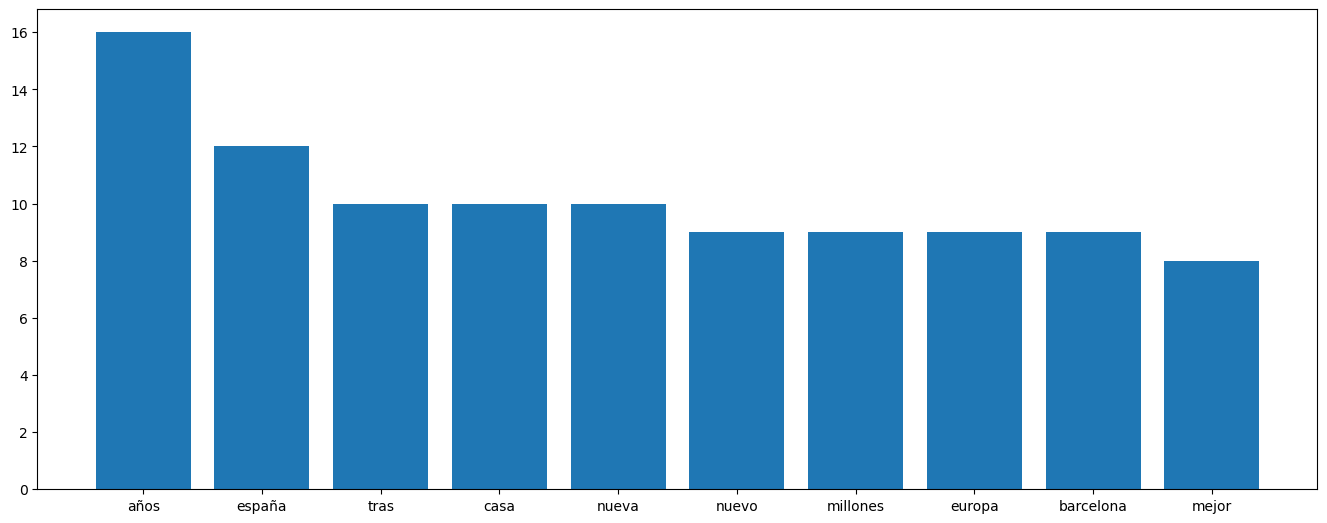

In [45]:
def plot_bar(data=df_titulares, top=10):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df_titulares.iloc[:top,:].index, height = df_titulares.iloc[:top,0].values)
    plt.show()

plot_bar()